In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

In [2]:
data=pd.read_csv("train.csv")


In [3]:
#data=pd.concat([train,test])

In [4]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
data.tail()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B
8067,461879,Male,Yes,37,Yes,Executive,0.0,Average,3.0,Cat_4,B


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 472.8+ KB


In [7]:
data.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [8]:
data.shape

(8068, 11)

In [9]:
data.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [10]:
data.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

###### Checking missing values

In [11]:
data.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

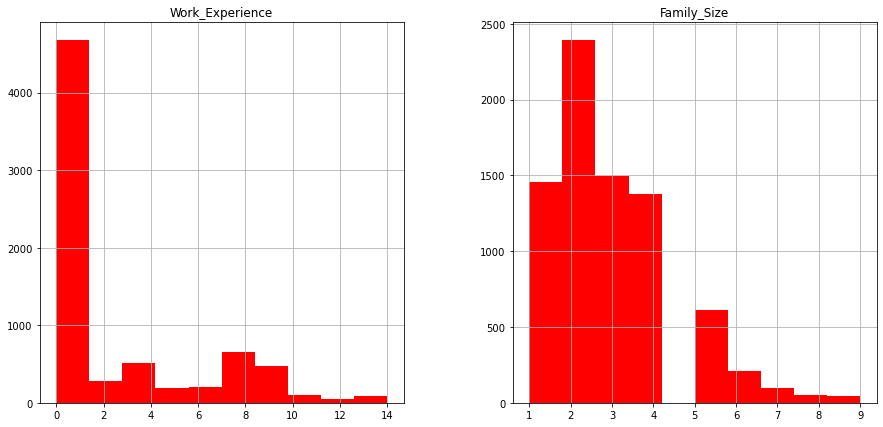

In [12]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(15,7),color='red')
plt.show()

In [13]:
data.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [14]:
for i in ['Work_Experience','Family_Size']:
    
    data[i]=data[i].fillna(data[i].mean())


In [15]:
# grouping ever_married on age

In [16]:
gp=pd.DataFrame(data.groupby('Ever_Married')['Age'].mean())

In [17]:
gp

,Age
Ever_Married,
No,32.237747
Yes,51.477278


In [18]:
df=pd.DataFrame(data)

df['Ever_Married']=df.groupby(['Ever_Married','Age'],sort=False)['Ever_Married'].apply(lambda x:x.fillna(x.mode().iloc[0]))

df['Ever_Married']=df.groupby('Ever_Married').Age.transform(lambda x: x.fillna(x.mode()[0]))

df['Ever_Married']=df.groupby('Ever_Married')['Age'].transform(lambda x: x.fillna(x.mode()))

In [19]:
#filling categorical values with mode

In [20]:
for j in ['Graduated','Ever_Married', 'Profession','Var_1']:
    data[j]=data[j].fillna(data[j].mode()[0])

In [21]:
data.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [22]:
#missing values are filled

In [23]:
#outlier detection
#ploting Boxplot to detect outliers

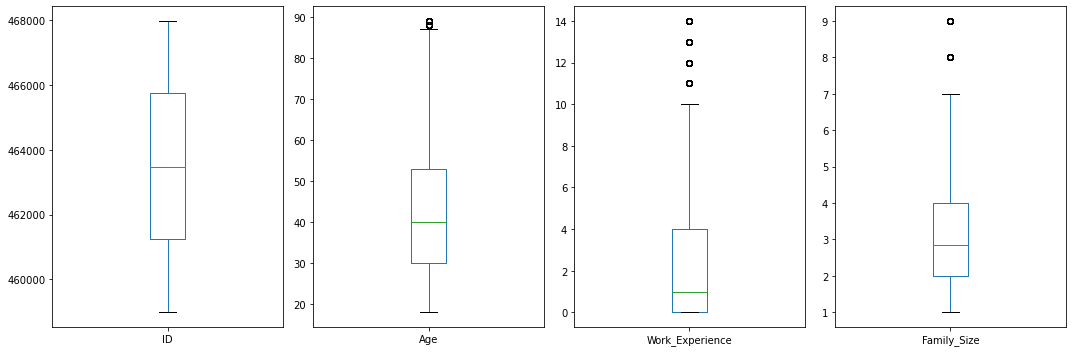

In [24]:
data.plot(kind= "box",figsize=(15,5),subplots=True)
plt.tight_layout()
plt.show()

In [25]:
outliers=['Work_Experience','Family_Size','Age']
for o in outliers:
    q1=np.percentile(data[o],25,interpolation='midpoint')
    q2=np.percentile(data[o],50,interpolation='midpoint')
    q3=np.percentile(data[o],75,interpolation='midpoint')
    IQR=q3-q1
    low=q1-1.5*IQR
    up=q3+1.5*IQR
    data.drop(data.loc[((data[o]<low )| (data[o]>up))].index,inplace=True)

In [26]:
data.shape

(7692, 11)

In [27]:
#label Encoding to the categorical values

In [28]:
data.select_dtypes('object').columns

Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1', 'Segmentation'],
      dtype='object')

In [29]:
col =[ 'Graduated','Gender','Ever_Married', 'Profession', 'Spending_Score', 'Var_1']

In [30]:
for i in col:
    print(i)
    print(data[i].value_counts())

Graduated
Yes    4834
No     2858
Name: Graduated, dtype: int64
Gender
Male      4228
Female    3464
Name: Gender, dtype: int64
Ever_Married
Yes    4573
No     3119
Name: Ever_Married, dtype: int64
Profession
Artist           2550
Healthcare       1283
Entertainment     914
Engineer          675
Doctor            660
Executive         568
Lawyer            544
Marketing         278
Homemaker         220
Name: Profession, dtype: int64
Spending_Score
Low        4641
Average    1920
High       1131
Name: Spending_Score, dtype: int64
Var_1
Cat_6    5053
Cat_4    1026
Cat_3     802
Cat_2     411
Cat_7     191
Cat_1     131
Cat_5      78
Name: Var_1, dtype: int64


In [31]:
from sklearn.preprocessing import LabelEncoder
for i in col :
    le=LabelEncoder()
    data[i]=le.fit_transform(data[i])

In [32]:
#scaling

In [33]:
data.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [34]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
data[['Work_Experience','Family_Size','Age']]=sd.fit_transform(data[['Work_Experience','Family_Size','Age']])

In [35]:
data.describe()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
count,7692.000000,7692.000000,7692.000000,7.692000e+03,7692.000000,7692.000000,7.692000e+03,7692.000000,7.692000e+03,7692.000000
mean,463488.569423,0.549662,0.594514,9.757030e-18,0.628445,2.702938,6.929512e-17,1.353744,8.710603e-18,4.136245
std,2599.787390,0.497560,0.491018,1.000065e+00,0.483252,2.522045,1.000065e+00,0.853185,1.000065e+00,1.428903
min,458982.000000,0.000000,0.000000,-1.561573e+00,0.000000,0.000000,-8.392897e-01,0.000000,-1.309744e+00,0.000000
25%,461249.750000,0.000000,0.000000,-7.551242e-01,0.000000,0.000000,-8.392897e-01,1.000000,-5.841151e-01,3.000000
50%,463476.500000,1.000000,1.000000,-1.347791e-01,1.000000,2.000000,-4.928528e-01,2.000000,3.275853e-02,5.000000
75%,465767.250000,1.000000,1.000000,6.096351e-01,1.000000,5.000000,2.000211e-01,2.000000,8.671425e-01,5.000000
max,467974.000000,1.000000,1.000000,2.656774e+00,1.000000,8.000000,2.625080e+00,2.000000,3.044029e+00,6.000000


<AxesSubplot:>

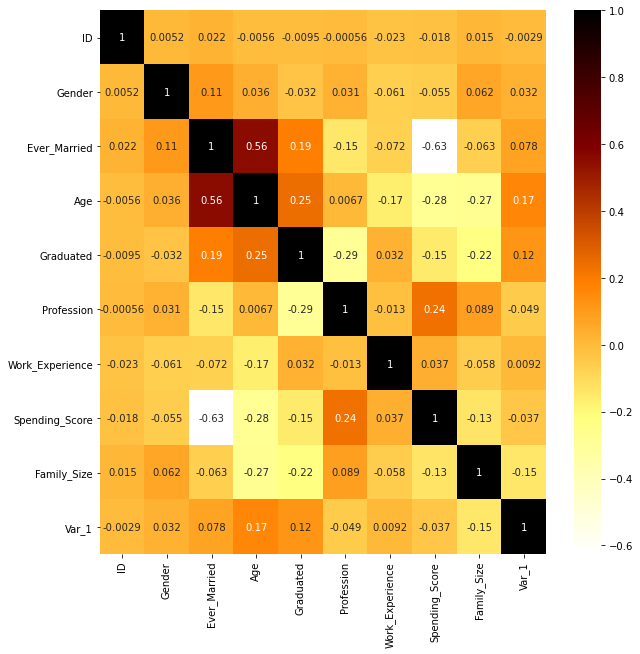

In [36]:
cor=data.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(cor ,annot=True,linecolor='white',cmap='afmhot_r')

In [37]:
#model Buliding

In [38]:
#Data Splitting 
X=data.drop(['ID','Segmentation'],axis=1)
y=data['Segmentation']

In [39]:
X.shape

(7692, 9)

In [40]:
y.shape

(7692,)

In [195]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100,test_size=0.2)

In [196]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,recall_score,precision_score

# Logistic Regression

In [187]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)
print(classification_report(y_test,y_pred,zero_division=1))

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           A       0.39      0.41      0.40       929
           B       0.32      0.12      0.17       915
           C       0.47      0.59      0.52       941
           D       0.60      0.75      0.66      1061

    accuracy                           0.48      3846
   macro avg       0.44      0.47      0.44      3846
weighted avg       0.45      0.48      0.45      3846



In [188]:
confusion_matrix(y_test,y_pred)

array([[385,  95, 185, 264],
       [291, 107, 375, 142],
       [153, 100, 553, 135],
       [167,  37,  61, 796]], dtype=int64)

# Random Forest Classifier

In [211]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=1000,random_state=100,bootstrap= True,
 criterion= 'entropy',verbose=2)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(classification_report(y_test,y_pred,zero_division=1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [213]:
confusion_matrix(y_test,y_pred)

array([[162,  73,  54,  88],
       [ 76, 133, 109,  40],
       [ 60,  83, 189,  46],
       [ 71,  22,  34, 299]], dtype=int64)

In [204]:
RandomForestClassifier()


RandomForestClassifier()

# Decision Tree Classifier

In [166]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(classification_report(y_test,y_pred,))

              precision    recall  f1-score   support

           A       0.37      0.36      0.36       377
           B       0.34      0.33      0.34       358
           C       0.42      0.44      0.43       378
           D       0.61      0.61      0.61       426

    accuracy                           0.44      1539
   macro avg       0.43      0.44      0.44      1539
weighted avg       0.44      0.44      0.44      1539



In [75]:
confusion_matrix(y_test,y_pred)

array([[131,  92,  72,  82],
       [ 85, 127, 101,  45],
       [ 70, 101, 160,  47],
       [ 83,  44,  45, 254]], dtype=int64)

In [49]:
print("accuracy :", accuracy_score(y_test,y_pred))

accuracy : 0.4284971398855954


# Knn

In [134]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors= np.arange(13,20)
for k in neighbors:
    kn=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    kn.fit(X_train,y_train)
    y_pred=kn.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [135]:
acc_values

[0.5172189733593242,
 0.5185185185185185,
 0.5146198830409356,
 0.5120207927225471,
 0.5126705653021443,
 0.5100714749837557,
 0.5074723846653671]

Text(0, 0.5, 'accuracy')

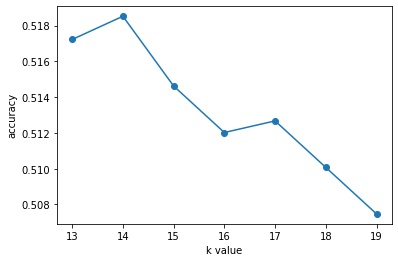

In [136]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel("k value")
plt.ylabel("accuracy")

In [138]:
kn=KNeighborsClassifier(n_neighbors=14,metric='minkowski',)
kn.fit(X_train,y_train)
y_pred=kn.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred,zero_division=1))  

              precision    recall  f1-score   support

           A       0.43      0.42      0.42       377
           B       0.44      0.33      0.38       358
           C       0.53      0.58      0.56       378
           D       0.62      0.71      0.66       426

    accuracy                           0.52      1539
   macro avg       0.50      0.51      0.50      1539
weighted avg       0.51      0.52      0.51      1539



In [58]:
confusion_matrix(y_test,y_pred)

array([[410, 224, 117, 165],
       [210, 312, 242, 105],
       [140, 231, 495, 110],
       [217,  90,  43, 735]], dtype=int64)

In [61]:
kn=KNeighborsClassifier(n_neighbors=13,metric='minkowski')


# Gradient booster

In [131]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(max_depth=200)
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)

In [132]:
print(classification_report(y_test,y_pred,zero_division=1))  

              precision    recall  f1-score   support

           A       0.41      0.41      0.41       377
           B       0.38      0.34      0.36       358
           C       0.49      0.51      0.50       378
           D       0.61      0.66      0.64       426

    accuracy                           0.49      1539
   macro avg       0.48      0.48      0.48      1539
weighted avg       0.48      0.49      0.48      1539



In [133]:
confusion_matrix(y_test,y_pred)

array([[153,  76,  59,  89],
       [ 78, 122, 109,  49],
       [ 60,  84, 192,  42],
       [ 80,  35,  29, 282]], dtype=int64)

# Testing

In [84]:
test=pd.read_csv("test.csv")


In [98]:
test.shape

(2627, 9)

In [85]:
for i in ['Work_Experience','Family_Size']:
     test[i]=test[i].fillna(test[i].mean())


In [86]:
for j in ['Graduated','Ever_Married', 'Profession','Var_1']:
    test[j]=test[j].fillna(test[j].mode()[0])

In [87]:
col =[ 'Graduated','Gender','Ever_Married', 'Profession', 'Spending_Score', 'Var_1']

In [88]:
for i in col :
    le=LabelEncoder()
    test[i]=le.fit_transform(test[i])

In [94]:
test=test.drop(['ID'],axis=1)


In [214]:
result =rf.predict(test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [215]:
sample=pd.read_csv('sample_submission.csv',index_col='ID')

In [216]:
sample.head()

,Segmentation
ID,
458989,A
458994,A
458996,A
459000,A
459001,A


In [217]:
sample.shape

(2627, 1)

In [218]:
sample['Segmentation']=result

In [219]:
sample.to_csv('submit1.csv')